# Training Model

In [1]:
from src.dataset_utils import Dataset
from src.model import OCRModel

In [6]:
img, label = next(iter(data.train_dataset))

In [2]:
i=0
data = Dataset()
data.build()
ocr_model = OCRModel(kfold_split=i)
ocr_model.train(data.train_dataset, data.val_dataset)
loss, acc = ocr_model.eval_model(data.val_dataset)
ocr_model.visualize_history()

[INFO] load mnist data took 0.19702672958374023 second
[INFO] load az data took 31.093719482421875 second
[INFO] combining dataset took 36.778767347335815 seconds
[INFO] building dataset tooks 40.602736711502075 seconds


ValueError: Exception encountered when calling layer "conv2d_29" "                 f"(type Conv2D).

Negative dimension size caused by subtracting 3 from 1 for '{{node inception_v3/conv2d_29/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](inception_v3/activation_28/Relu, inception_v3/conv2d_29/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,96], [3,3,96,96].

Call arguments received by layer "conv2d_29" "                 f"(type Conv2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 96), dtype=float32)

In [ ]:
ocr_model.model.summary()

# Model Inference

In [81]:
from src.dataset_utils import load_az_dataset, combining_dataset, load_mnist_dataset
import matplotlib.pyplot as plt
import numpy as np
import random

In [56]:
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

In [44]:
data = Dataset()
data.build()

[INFO] building dataset tooks 48.55380630493164 seconds


In [39]:
ocr_model_path = 'models/mobilenet_3/cp.ckpt'
model = OCRModel(3)
model.load(model_type='mobilenet', model_path=ocr_model_path)

[INFO] initializing model took 3.963696241378784 seconds
[INFO] loading the model took 4.404262065887451 seconds


In [1]:
img, label = next(iter(data.train_dataset))

NameError: name 'data' is not defined

In [76]:
preds = model.model.predict(img)

4/4 [==============================] - 8s 8ms/step


In [78]:
preds.shape

(128, 36)

label:  U
predicted:  U


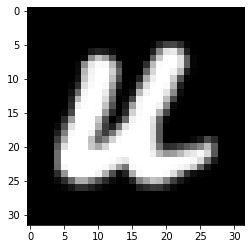

In [98]:
test_idx = random.randint(0, img.shape[0])
label_idx = np.argmax(label[test_idx])
preds_idx = np.argmax(preds[test_idx])
print('label: ', labelNames[label_idx])
print('predicted: ', labelNames[preds_idx])
plt.imshow(img[test_idx])

In [72]:
np.max(img[0][:,:,0])

1.0

In [3]:
data, label = load_az_dataset('dataset/A_Z Handwritten Data.csv')

In [37]:
for i,l in enumerate(label):
    if l==3:
        print(i)
        break

45947


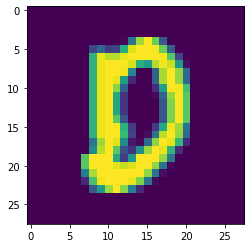

In [38]:
plt.imshow(data[i+16])

# Eksperimen

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import cv2

In [16]:
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

In [79]:
img, label = next(iter(data.train_dataset))

In [80]:
data_augmentation = tf.keras.Sequential([
                            tf.keras.layers.RandomFlip("horizontal_and_vertical"),
                            tf.keras.layers.RandomRotation((-0.2, 0.3))
])

U


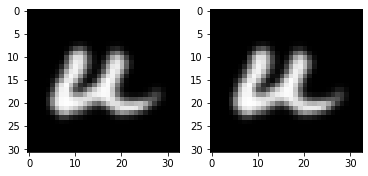

In [95]:
i = random.randint(0, 128)
label_idx = np.argmax(label[i])
fig, axs = plt.subplots(ncols=2, nrows=1)
augmented_img = data.data_augmentation(img[i])
axs[0].imshow(img[i])
axs[1].imshow(augmented_img)
print(labelNames[label_idx])

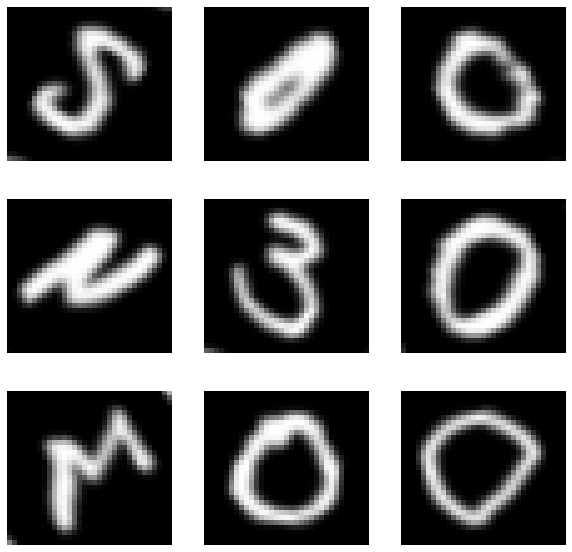

In [96]:
plt.figure(figsize = (10,10))
for i in range(9):
  id = random.randint(0, 128)
  augmented_image = data_augmentation(img)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[id])
  plt.axis("off")